In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0201/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 435 ms, sys: 18.3 ms, total: 453 ms
Wall time: 455 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,-0.004541,0.0,-0.010164,0.0,-0.019840,0.0,-0.005006,0.0,-0.037033,...,0.000000e+00,-0.004786,0.0,-0.000242,0.0,0.000467,0.0,0.005577,0.0,-0.003708
1,0.0,0.004050,0.0,0.004103,0.0,-0.011531,0.0,-0.004805,0.0,-0.019896,...,2.317985e-04,-0.002945,0.0,0.001218,0.0,-0.001032,0.0,-0.003845,0.0,-0.000866
2,0.0,-0.001229,0.0,-0.000202,0.0,-0.015666,0.0,-0.003777,0.0,-0.009648,...,1.185987e-09,-0.006368,0.0,-0.002138,0.0,-0.004796,0.0,-0.015330,0.0,-0.002189
3,0.0,0.005885,0.0,0.011435,0.0,-0.002345,0.0,-0.003185,0.0,-0.014493,...,0.000000e+00,-0.002975,0.0,0.005170,0.0,-0.000173,0.0,-0.012279,0.0,0.002978
4,0.0,0.001654,0.0,0.000605,0.0,-0.003648,0.0,-0.002957,0.0,-0.006354,...,0.000000e+00,-0.001731,0.0,0.002636,0.0,0.003816,0.0,-0.004361,0.0,0.006272


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.0,0.0,7.834402e-07,0.000004,0.0,0.0,...,0.0,0.0,0.000002,0.387255,0.026875,0.000000e+00,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000865,0.294906,2.317985e-04,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000054,0.000619,1.185987e-09,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000567,0.000107,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.0,0.0,7.834405e-07,0.000004,0.0,0.0,...,0.0,0.0,2.478146e-06,0.472933,0.027239,0.000000e+00,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000866,0.343000,2.318253e-04,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000054,0.000620,1.185987e-09,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,5.671876e-04,0.000107,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,2.057258e-07,0.001316,0.000011,0.000000e+00,0.0,0.0,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    45.000217
1    45.000040
2    47.000001
3    37.999999
4    42.000041
5    35.000000
6    29.000000
dtype: float64

In [26]:
%%time
catch_all_averaged_preds = []
for i in range(910):
    file_name = "all_forecasts_sub_" + str(i) + '.npy'
    al_forecasts_npy_file = np.load(os.path.join(path_to_dfs, file_name))
    # make the conversion
    sub_window_forecasts = np.exp(al_forecasts_npy_file) - 1
    # get rid of anything below zero?
    # sub_window_forecasts[sub_window_forecasts < 0] = 0
    # get averages over time 
    sub_window_forecasts_averaged = np.mean(sub_window_forecasts, axis = (0,1))
    catch_all_averaged_preds.append(sub_window_forecasts_averaged)    

CPU times: user 157 ms, sys: 39.5 ms, total: 196 ms
Wall time: 197 ms


In [27]:
len(catch_all_averaged_preds)

910

In [28]:
catch_all_averaged_preds[0]

array([-0.00445725,  0.00416799, -0.0012028 ,  0.00604926,  0.00168748,
        0.00271221,  0.00075617], dtype=float32)

In [29]:
# make this a dataframe

In [30]:
Forecasted_values_df = pd.DataFrame(catch_all_averaged_preds).T

In [31]:
Forecasted_values_df.shape

(7, 910)

In [32]:
sum_forecasted_values = Forecasted_values_df.sum(axis = 1)

In [33]:
sum_forecasted_values

0    30.892008
1    30.807446
2    34.043934
3    54.697418
4    35.002048
5    41.004250
6    59.950989
dtype: float32

In [34]:
# These results are absurd, let's stick to what we had done before, we can justify that, this is what we did for comps as well

In [35]:
# concatenate the sum dataframes
block_0201_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0201_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0201_true_and_forecasted_values_df

,True_count,Forecasted_count
0,45.000217,30.892008
1,45.000040,30.807446
2,47.000001,34.043934
3,37.999999,54.697418
4,42.000041,35.002048
5,35.000000,41.004250
6,29.000000,59.950989


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

16.432204477602216

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

14.558217291158476

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=-0.8650284533610544, pvalue=0.011937467236163303)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-6.4749774546746925

##### Coverages and widths for the forecasted values?

In [42]:
# for this we need the all_forecasts npy files

In [43]:
# content location is the same path as above

In [44]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [45]:
# all_forecasts_npy_files

In [46]:
# load the npy files

In [47]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.mean(np.exp(load_file)-1, axis = 1)
    loaded_npy_files.append(mean_file)

CPU times: user 236 ms, sys: 66.2 ms, total: 302 ms
Wall time: 303 ms


In [48]:
len(loaded_npy_files)

910

In [49]:
loaded_npy_files[0].shape

(1000, 7)

In [50]:
loaded_npy_files[0]

array([[ 0.00488734,  0.00903931,  0.00105776, ...,  0.00357825,
         0.00302123,  0.00020184],
       [ 0.00402786,  0.01050359, -0.00235067, ...,  0.00285962,
         0.00365056,  0.0009068 ],
       [ 0.00410409,  0.00729522, -0.00314251, ...,  0.00381906,
         0.00413617,  0.00014594],
       ...,
       [-0.00675556,  0.00168884, -0.00055966, ...,  0.00455639,
         0.00458869,  0.00264347],
       [-0.00195323,  0.00231546,  0.00435555, ...,  0.00226188,
         0.00427097,  0.00434223],
       [-0.00480118,  0.00523666,  0.00326909, ...,  0.00530735,
         0.00798583,  0.00406879]], dtype=float32)

In [51]:
# %%time
# # convert less than 0 entries to 0 for all arrays
# for arr in loaded_npy_files:
#     arr[arr < 0] = 0

In [52]:
loaded_npy_files[0]

array([[ 0.00488734,  0.00903931,  0.00105776, ...,  0.00357825,
         0.00302123,  0.00020184],
       [ 0.00402786,  0.01050359, -0.00235067, ...,  0.00285962,
         0.00365056,  0.0009068 ],
       [ 0.00410409,  0.00729522, -0.00314251, ...,  0.00381906,
         0.00413617,  0.00014594],
       ...,
       [-0.00675556,  0.00168884, -0.00055966, ...,  0.00455639,
         0.00458869,  0.00264347],
       [-0.00195323,  0.00231546,  0.00435555, ...,  0.00226188,
         0.00427097,  0.00434223],
       [-0.00480118,  0.00523666,  0.00326909, ...,  0.00530735,
         0.00798583,  0.00406879]], dtype=float32)

In [53]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [54]:
output.shape

(1000, 7)

In [55]:
output

array([[ 36.805603,  35.496384,  41.924213, ...,  32.958862,  37.468887,
         49.043518],
       [ 29.312786,  26.614609,  33.752674, ...,  30.458265,  38.67328 ,
         42.94491 ],
       [ 35.248905,  36.31222 ,  40.940136, ...,  30.296991,  36.907406,
         27.864166],
       ...,
       [ 31.117317,  32.164776,  36.722256, ...,  37.865494,  46.12908 ,
         59.466568],
       [ 46.245476,  37.037884,  50.797523, ...,  77.683784,  75.12939 ,
        115.06677 ],
       [ 33.900677,  35.618816,  49.330036, ...,  57.316036,  56.45494 ,
         95.342285]], dtype=float32)

In [56]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [57]:
output_alt.shape

(1000, 7)

In [58]:
output_alt

array([[ 36.805603,  35.496384,  41.924213, ...,  32.958862,  37.468887,
         49.043518],
       [ 29.312786,  26.614609,  33.752674, ...,  30.458265,  38.67328 ,
         42.94491 ],
       [ 35.248905,  36.31222 ,  40.940136, ...,  30.296991,  36.907406,
         27.864166],
       ...,
       [ 31.117317,  32.164776,  36.722256, ...,  37.865494,  46.12908 ,
         59.466568],
       [ 46.245476,  37.037884,  50.797523, ...,  77.683784,  75.12939 ,
        115.06677 ],
       [ 33.900677,  35.618816,  49.330036, ...,  57.316036,  56.45494 ,
         95.342285]], dtype=float32)

In [59]:
np.mean(output_alt == output)

1.0

In [60]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [61]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [62]:
li_train

array([[16.59757462],
       [18.57336555],
       [19.72631087],
       [22.09063272],
       [15.98648911],
       [23.52146049],
       [23.89192133]])

In [63]:
ui_train

array([[ 49.10253696],
       [ 43.95636625],
       [ 48.1120923 ],
       [132.20792923],
       [ 66.03211994],
       [ 68.3460165 ],
       [168.37045784]])

In [64]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [65]:
avg_width_train

62.24853776523044

In [66]:
y_traina = block_0201_true_and_forecasted_values_df[["True_count"]].values

In [67]:
y_traina

array([[45.00021741],
       [45.00003971],
       [47.00000141],
       [37.99999928],
       [42.00004107],
       [35.00000009],
       [29.00000004]])

In [68]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [69]:
coverage_train

0.8571428571428571

In [70]:
np.mean(output, axis = 0)

array([30.892027, 30.807432, 34.043934, 54.69743 , 35.002052, 41.00424 ,
       59.950943], dtype=float32)

In [71]:
sum_forecasted_values

0    30.892008
1    30.807446
2    34.043934
3    54.697418
4    35.002048
5    41.004250
6    59.950989
dtype: float32

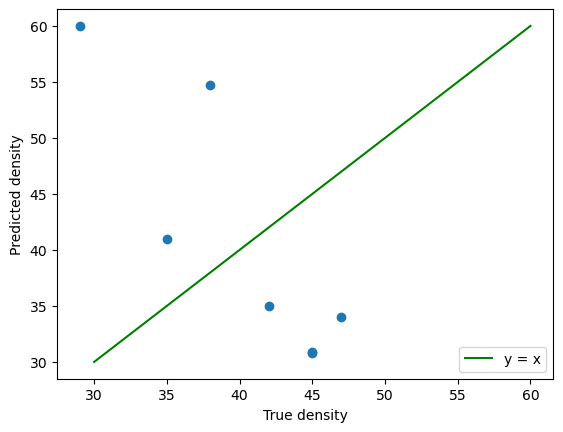

In [76]:
plt.scatter(block_0201_true_and_forecasted_values_df['True_count'], block_0201_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([30, 60], [30, 60], color='green', label='y = x')
plt.legend()
plt.show()

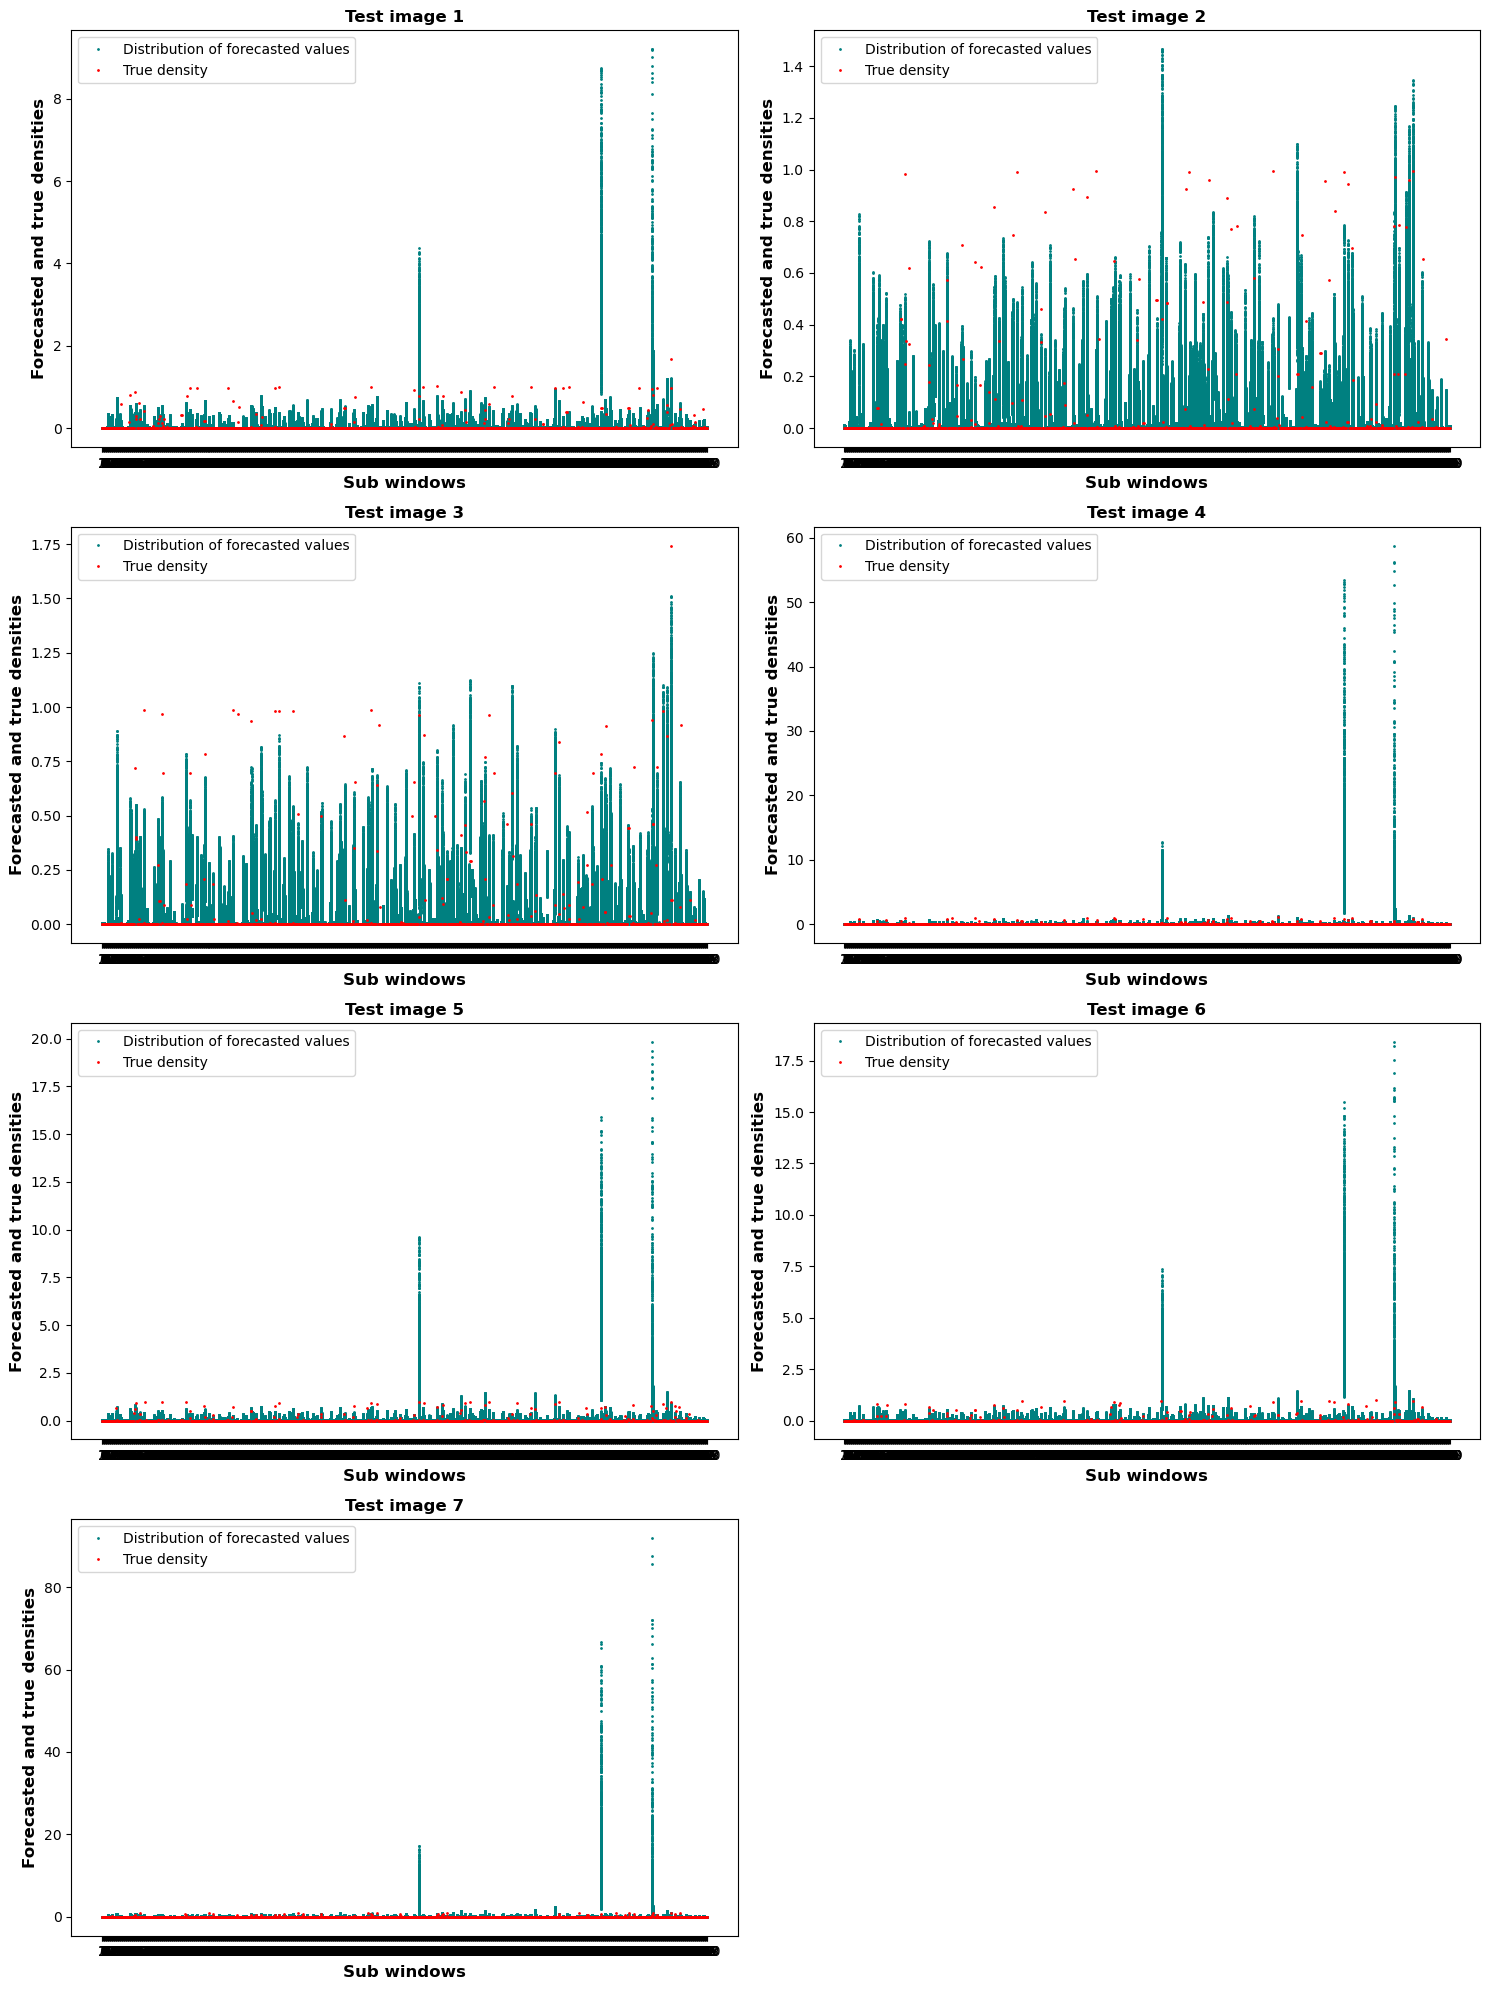

CPU times: user 26.9 s, sys: 872 ms, total: 27.8 s
Wall time: 27.4 s


In [73]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [74]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots

In [75]:
# we may need to re-think about the way the average forecasts were computed. Maybe get the average after exponentiating than averaging all values to a single value and then exponentiating? this would be a few lines of codes - but may be a better way to get the forecated density values? 